In [99]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.stats import describe
import numpy as np
from sklearn import datasets
import pandas as pd

In [106]:
# List of character names from the American version of "The Office" and some others
office_names = ['Jim', 'Pam', 'Dwight', 'Michael', 'Angela']

In [107]:
# Generate additional unique fictional character names
num_additional_names = 195
remaining_names = list(set(office_names) ^ set([]))
fictional_names = office_names + np.random.choice(remaining_names, size=num_additional_names, replace=True).tolist()

In [108]:
# Generate fictional DataFrame
data = {
    'First_Name': fictional_names,
    'Last_Name': np.random.choice(['Smith', 'Johnson', 'Brown', 'Anderson', 'Wilson', 'Martin', 'Carter', 'Black'], size=200),
    'Department': np.random.choice(['Sales', 'Marketing', 'Warehouse', 'Accounting', 'Human Resources'], size=200),
    'Average_Daily_Sales': np.random.randint(500, 3000, size=200),
    'Sex': np.random.choice(['Male', 'Female'], size=200),
    'Salary': np.random.randint(40000, 100000, size=200)
}

df = pd.DataFrame(data)
df

,First_Name,Last_Name,Department,Average_Daily_Sales,Sex,Salary
0,Jim,Martin,Accounting,518,Male,54611
1,Pam,Brown,Warehouse,2859,Male,49888
2,Dwight,Black,Accounting,1818,Female,52028
3,Michael,Anderson,Accounting,2898,Female,60356
4,Angela,Wilson,Warehouse,822,Male,61848
...,...,...,...,...,...,...
195,Jim,Smith,Accounting,1757,Female,57890
196,Jim,Wilson,Marketing,587,Female,78318
197,Dwight,Black,Sales,2377,Female,68492
198,Michael,Smith,Warehouse,2869,Female,64613


In [67]:
# Find the average salary
df["Salary"].mean()

71525.405

In [68]:
# Find the minimum Average Daily Sales
print(df[df.Average_Daily_Sales == df.Average_Daily_Sales.max()])

   First_Name Last_Name Department  Average_Daily_Sales     Sex  Salary
52     Angela     Smith  Marketing                 2995  Female   89982


In [69]:
# Find the maximum Average Daily Sales
print(df[df.Average_Daily_Sales == df.Average_Daily_Sales.min()])

   First_Name Last_Name Department  Average_Daily_Sales     Sex  Salary
14    Michael     Brown    Finance                  502  Female   76507


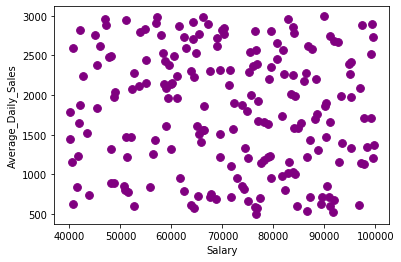

In [70]:
# Draw a scatter plot and here size of dots determined by age of person
# df.plot.scatter(x = 'Salary', y = 'Average_Daily_Sales', s = 'Salary', c = 'green')

df.plot.scatter(x='Salary', y='Average_Daily_Sales', s=60, c='purple')

The r-squared is: 0.006799168270994872
The correlation coefficient confirms a very weak negative correlation
There seems to be no relationship between how much each employee makes for the company and how much each employee makes for themselves


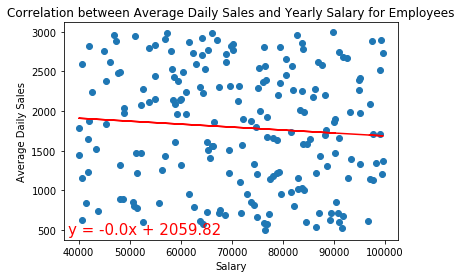

In [97]:
# Add the linear regression equation and line to plot
# The linear regression shows 
x_values = df['Salary']
y_values = df['Average_Daily_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38000,450),fontsize=15,color="red")
plt.title('Correlation between Average Daily Sales and Yearly Salary for Employees')
plt.xlabel('Salary')
plt.ylabel('Average Daily Sales')
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient confirms a very weak negative correlation"
"\nThere seems to be no relationship between how much each employee makes for the company and how much each employee makes for themselves")
# plt.tight_layout()
plt.show()

,Average_Daily_Sales,Salary
count,200.000000,200.000000
mean,1793.365000,71525.405000
std,751.290529,16629.023782
min,502.000000,40023.000000
25%,1160.750000,58842.250000
50%,1846.000000,72624.000000
75%,2446.000000,84605.500000
max,2995.000000,99718.000000
